## What is COVID-19?

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1
'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

![Coronavirus particle Image](https://www.apta.com/wp-content/uploads/home-banner-1.jpg)

In [1]:
# Imports packages

from IPython.core.display import display, HTML 
from IPython.display import YouTubeVideo
import ipywidgets as widgets
from ipywidgets import interact

import folium
from folium import plugins

import numpy as np
import pandas as pd
import json

import plotly as py
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# load Covid_data
cd=pd.read_csv('https://raw.githubusercontent.com/osamazalaf/covid19jordan/main/data/covidmap.csv')
cd1=pd.read_csv('https://raw.githubusercontent.com/osamazalaf/covid19jordan/main/data/covidmap.csv')

cd2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

cd3=pd.read_csv('https://raw.githubusercontent.com/osamazalaf/covid19jordan/main/data/Covidss.csv')

cd4=pd.read_csv('https://raw.githubusercontent.com/osamazalaf/covid19jordan/main/data/Coviddaily.csv')

In [9]:
cd20=cd2[cd2.Country_Region == 'Jordan']

# total number of confirmed, death , recovered and active cases
confirmed_total = int(cd20['Confirmed'])
deaths_total = int(cd20['Deaths'])
recovered_total = int(cd20['Recovered'])
active_total = int(cd20['Active'])


# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:24px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: #fff; font-size:24px;margin-left:10px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:24px; margin-left:10px;'> Recovered: " + str(recovered_total) + "</span>"+
             "<span style='color: lightblue; font-size:24px; margin-left:10px;'> Active: " + str(active_total) + "</span>"+
             "</div>")
       )

In [30]:
cd1["Confirmed"]=np.log10(cd1["Confirmed"])

# Create map with location start point, zoom level and distance scale
map = folium.Map(location=[32,36], zoom_start=6.45,control_scale=True)
                
# load geo_json
country_info = json.load(open('gov.json', encoding='utf-8'))


choropleth = folium.Choropleth(
    geo_data=country_info,
    name='Jordan Confirmed Cases',
    data=cd1,
    columns=['OBJECTID', 'Confirmed'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.properties.OBJECTID',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Confirmed Cases',
    highlight=True
).add_to(map)

tooltip_text = []
for i in range(0,len(cd)):
    tooltip_text.append('<li><bold> Country: '+str(cd.iloc[i]['City'])+
                          '<li><bold>Total Confirmed: '+str(cd.iloc[i]['Confirmed'])+
                           '<li><bold>Today Cases: '+str(cd.iloc[i]['today'])+
                           '<li><bold>Top Confirmed Cases: '+str(cd.iloc[i]['top Confirmed']))
tooltip_text
           
# Append a tooltip column with customised text
for i in range(0,len(tooltip_text)):
    country_info['features'][i]['properties']['tooltip1'] = tooltip_text[i]
    
    
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], labels=False)
)
        

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map)

folium.LayerControl().add_to(map)


# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map)


# measure control
measure_control = plugins.MeasureControl(position='topleft', 
                                         active_color='red', 
                                         completed_color='red', 
                                         primary_length_unit='kilometers')

# add measure control to map
map.add_child(measure_control)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=False)
# add draw tools to map
draw.add_to(map)

minimap=plugins.MiniMap(toggle_display=True,auto_toggle_display=True)
map.add_child(minimap)

# put in path.html
#map.save('map.html')
# display map
display(map)

KeyError: 'Today'

In [29]:
def plot_cases_of_a_country(City):
    labels = ['confirmed']
    colors = ['Red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [cd3]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if City == 'Jordan':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['City'] == City].iloc[:,20:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['City'] == City].iloc[:,20:]),axis = 0)
        print(i)
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True
        ));
    
    fig.update_layout(
        title="Daily Confirmed COVID 19 Cases of " + City,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",height=600)
    
    fig.update_yaxes(type="linear")
    fig.show();
    
interact(plot_cases_of_a_country, City='Jordan')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears

interactive(children=(Text(value='Jordan', description='City'), Output()), _dom_classes=('widget-interact',))

In [12]:
fig3 = px.pie(cd, values='Confirmed', names='City', color="Confirmed", hole=0.3,height=475)
fig3.update_traces(textinfo="label+percent", insidetextfont=dict(color="white"))
fig3.update_layout(legend={"itemclick":False})
fig3.update_layout(title='Confirmed Cases Percentage of Covid-19 in Jordan')

fig3 = go.FigureWidget(fig3)
display(fig3)

FigureWidget({
    'data': [{'customdata': array([[ 11601],
                                   [ 48569],
     …

In [13]:
fig5 = px.bar(cd, x='City', y='Confirmed', color='City',
             labels={'pop':'Confirmed Cases'},height=525)

fig5 = go.FigureWidget(fig5)
display(fig5)

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'City=%{x}<br>Confirmed=…

In [14]:
fig2 = px.scatter(cd4, y="Date", x="Confirmed",
                size="Confirmed", color="City",
                 hover_name="City", log_x=True,size_max=30,title='Jordan Covid19 Daily Cases Compare',height=550)

fig2=go.FigureWidget(fig2)
display(fig2)

FigureWidget({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>Cit' ... 'e}<br>Date=%{y}<extra></e…

In [15]:
cd30=cd2[cd2['Active']<100000]

fig4 = go.Figure(data=go.Choropleth(
    locations=cd30['Country_Region'], # Spatial coordinates
    z = cd30['Active'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale='YLOrRd'))

fig4.update_layout(
    title_text = 'Active Covid-19 Cases Last Day In Asia less than 100000 Cases',
    geo_scope='asia',height=500)

fig4.update_geos(fitbounds='locations',visible=False)

fig4=go.FigureWidget(fig4)
display(fig4)

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(255,255,204)'], [0.125,
                             'r…

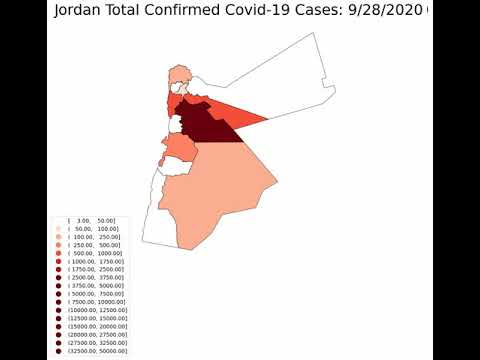

In [16]:
id='7e3oAU419k8'
YouTubeVideo(id=id,width=450,height=450)

## Notebook covers:

1. What is COVID-19? [Covid wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019)
2. Data loading from [Ministry of Health The Hashemite kingdom of Jordan](https://corona.moh.gov.jo/en)





## Symptoms
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.
* cough
* fever
* tiredness
* difficulty in breathing(severe cases)




## More Info on COVID-19 for Other Countries:
* [https://www.worldometers.info/coronavirus/](https://www.worldometers.info/coronavirus/)


## Our World Covid Tracker App :
* [Download the App (World Covid Tracker in Pc)](https://drive.google.com/file/d/1ft9ujDivzSY6Z_uDqrlrbBZLMKOMzDJC/view)



## If You Want The Site Send You The Latest Information about Covid-19 in Jordan Via Email Please Contact Us By The Following Email:
* coviid19jo@gmail.com

## Done By BAU Sureving&Geomatics Students.